In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('../data/simulatedLoadRate.xlsx', parse_dates=['日期'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35136 entries, 0 to 35135
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   日期            35136 non-null  datetime64[ns]
 1   时点            35136 non-null  object        
 2   原始功率预测均值（MW）  35136 non-null  float64       
 3   日前-实时         35136 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ MB


In [10]:
bins = np.linspace(df['原始功率预测均值（MW）'].min(), df['原始功率预测均值（MW）'].max(), 25)
df['forecast_bin'] = pd.cut(df['原始功率预测均值（MW）'], bins)

各预测负荷率分箱下新能源披露偏差为正的概率：
forecast_bin
(0.01, 3.929]       0.540576
(3.929, 7.848]      0.478501
(7.848, 11.767]     0.415310
(11.767, 15.686]    0.402282
(15.686, 19.605]    0.392516
(19.605, 23.524]    0.421644
(23.524, 27.443]    0.383250
(27.443, 31.361]    0.370346
(31.361, 35.28]     0.410237
(35.28, 39.199]     0.418513
(39.199, 43.118]    0.377228
(43.118, 47.037]    0.505376
(47.037, 50.956]    0.462647
(50.956, 54.875]    0.471106
(54.875, 58.794]    0.518571
(58.794, 62.713]    0.550296
(62.713, 66.632]    0.624060
(66.632, 70.551]    0.675824
(70.551, 74.47]     0.676626
(74.47, 78.389]     0.706564
(78.389, 82.307]    0.824380
(82.307, 86.226]    0.821277
(86.226, 90.145]    0.955556
(90.145, 94.064]    0.692308
Name: 日前-实时, dtype: float64


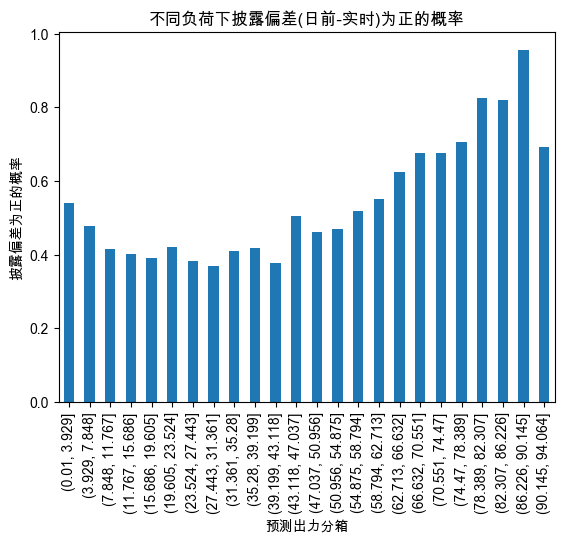

In [14]:
positive_prob = df.groupby('forecast_bin', observed=False)['日前-实时'].apply(
    lambda x: (x > 0).mean()
)
print("各预测负荷率分箱下新能源披露偏差为正的概率：")
print(positive_prob)

# 设置支持中文的字体
# plt.rcParams['font.sans-serif'] = ['LXGW']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 避免负号显示为方块
plt.rcParams['axes.unicode_minus'] = False
positive_prob.plot(kind='bar')
plt.xlabel('预测出力分箱')
plt.ylabel('披露偏差为正的概率')
plt.title('不同负荷下披露偏差(日前-实时)为正的概率')
plt.show()

各预测负荷率分箱下新能源披露偏差为正的概率：
forecast_bin
(0.499, 4.194]      0.503521
(4.194, 7.889]      0.435227
(7.889, 11.584]     0.385886
(11.584, 15.279]    0.342360
(15.279, 18.974]    0.321888
(18.974, 22.669]    0.346330
(22.669, 26.364]    0.246914
(26.364, 30.059]    0.265060
(30.059, 33.754]    0.333333
(33.754, 37.448]    0.336207
(37.448, 41.143]    0.290323
(41.143, 44.838]    0.306122
(44.838, 48.533]    0.449153
(48.533, 52.228]    0.389313
(52.228, 55.923]    0.450980
(55.923, 59.618]    0.431507
(59.618, 63.313]    0.441441
(63.313, 67.008]    0.518519
(67.008, 70.703]    0.492308
(70.703, 74.398]    0.500000
(74.398, 78.093]    0.369565
(78.093, 81.788]    0.540541
(81.788, 85.482]    0.719298
(85.482, 89.177]    0.951220
Name: 日前-实时, dtype: float64


/var/folders/c_/cnt9g3l16nd_mqc7h_h8_m280000gn/T/ipykernel_13972/3629777500.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[(59.618, 63.313], (59.618, 63.313], (59.618, 63.313], (63.313, 67.008], (63.313, 67.008], ..., (22.669, 26.364], (22.669, 26.364], (18.974, 22.669], (18.974, 22.669], (18.974, 22.669]]
Length: 6222
Categories (24, interval[float64, right]): [(0.499, 4.194] < (4.194, 7.889] < (7.889, 11.584] < (11.584, 15.279] ... (74.398, 78.093] < (78.093, 81.788] < (81.788, 85.482] < (85.482, 89.177]]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_filtered.loc[:, 'forecast_bin'] = pd.cut(


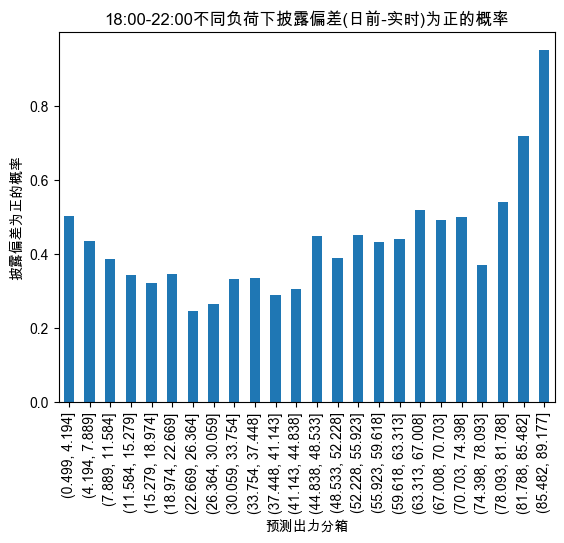

In [15]:
df['时刻'] = pd.to_datetime(df['日期'].astype(str) + ' ' + df['时点'].astype(str), errors='coerce')

# Step 3: 筛选时刻在 18:00 至 21:45
mask = (df['时刻'].dt.time >= pd.to_datetime('18:00').time()) & (df['时刻'].dt.time <= pd.to_datetime('22:00').time())
df_filtered = df[mask]

df_filtered.loc[:, 'forecast_bin'] = pd.cut(
    df_filtered['原始功率预测均值（MW）'],
    bins=np.linspace(
        df_filtered['原始功率预测均值（MW）'].min(),
        df_filtered['原始功率预测均值（MW）'].max(),
        25
    )
)
positive_prob = df_filtered.groupby('forecast_bin', observed=False)['日前-实时'].apply(
    lambda x: (x > 0).mean()
)
print("各预测负荷率分箱下新能源披露偏差为正的概率：")
print(positive_prob)

# 设置支持中文的字体
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# 避免负号显示为方块
plt.rcParams['axes.unicode_minus'] = False
positive_prob.plot(kind='bar')
plt.xlabel('预测出力分箱')
plt.ylabel('披露偏差为正的概率')
plt.title('18:00-22:00不同负荷下披露偏差(日前-实时)为正的概率')
plt.show()